Importing packages and creating the DataFrame

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')

Calculating average and median annual income of the customers

In [84]:
average_income = df['Annual Income (k$)'].mean()
median_income = df['Annual Income (k$)'].median()
min_income = df['Annual Income (k$)'].min()
max_income = df['Annual Income (k$)'].max()
q1_income = df['Annual Income (k$)'].quantile(0.25)
q3_income = df['Annual Income (k$)'].quantile(0.75)

print(f"Average annual income of customers: ${average_income}K")
print(f"Median annual income of customers: ${median_income}K")
if average_income > median_income:
    print("The data is skewed to the right \n")
elif average_income < median_income:
    print("The data is skewed to the left \n")
else:
    print("The data is normal \n")

print(f"Minimum annual income of customers: ${min_income}K")
print(f"Q1 annual income of customers: ${q1_income}K")
print(f"Q3 annual income of customers: ${q1_income}K")
print(f"Maximum annual income of customers: ${max_income}K")


Average annual income of customers: $60.56K
Median annual income of customers: $61.5K
The data is skewed to the left 

Minimum annual income of customers: $15K
Q1 annual income of customers: $41.5K
Q3 annual income of customers: $41.5K
Maximum annual income of customers: $137K


Creating a box plot

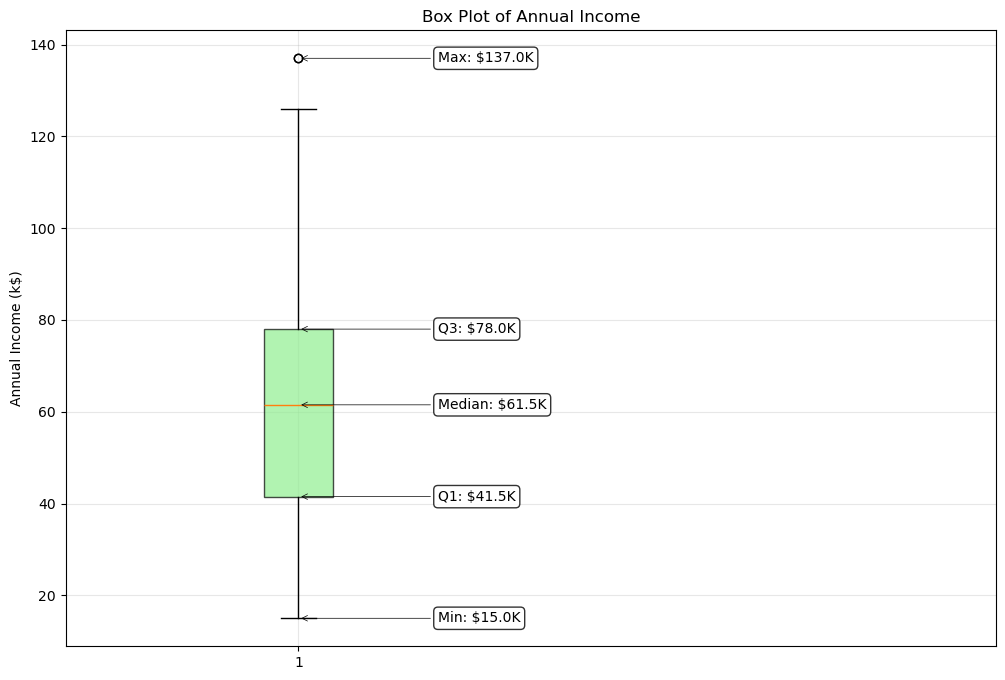

In [85]:
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(df['Annual Income (k$)'], patch_artist = True, boxprops = dict(facecolor = 'lightgreen', alpha = 0.7))

stats = df['Annual Income (k$)'].describe()

values = {
    'Min': stats['min'],
    'Q1': stats['25%'],
    'Median': stats['50%'],
    'Q3': stats['75%'],
    'Max': stats['max']
}

for label, value in values.items():
    plt.annotate(f'{label}: ${value:.1f}K', xy = (1, value), xytext = (1.3, value), fontsize = 10, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'black', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.3", facecolor = "white", alpha = 0.8))

plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.xlim(0.5, 2.5)
plt.grid(True, alpha=0.3)
plt.show()

Showing the number of males vs. females


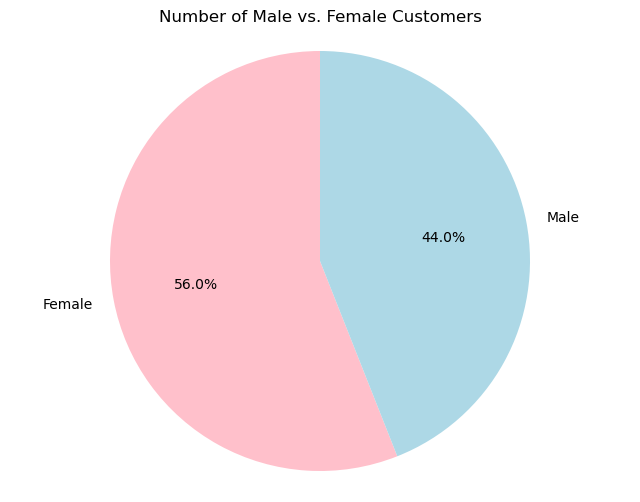

In [86]:
gender_counts = df['Genre'].value_counts()

plt.figure(figsize = (8, 6))
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 90, colors = ['pink', 'lightblue'])
plt.title('Number of Male vs. Female Customers')
plt.axis('equal')

# Showing the pie chart
plt.show()

Box plot of annual income by gender

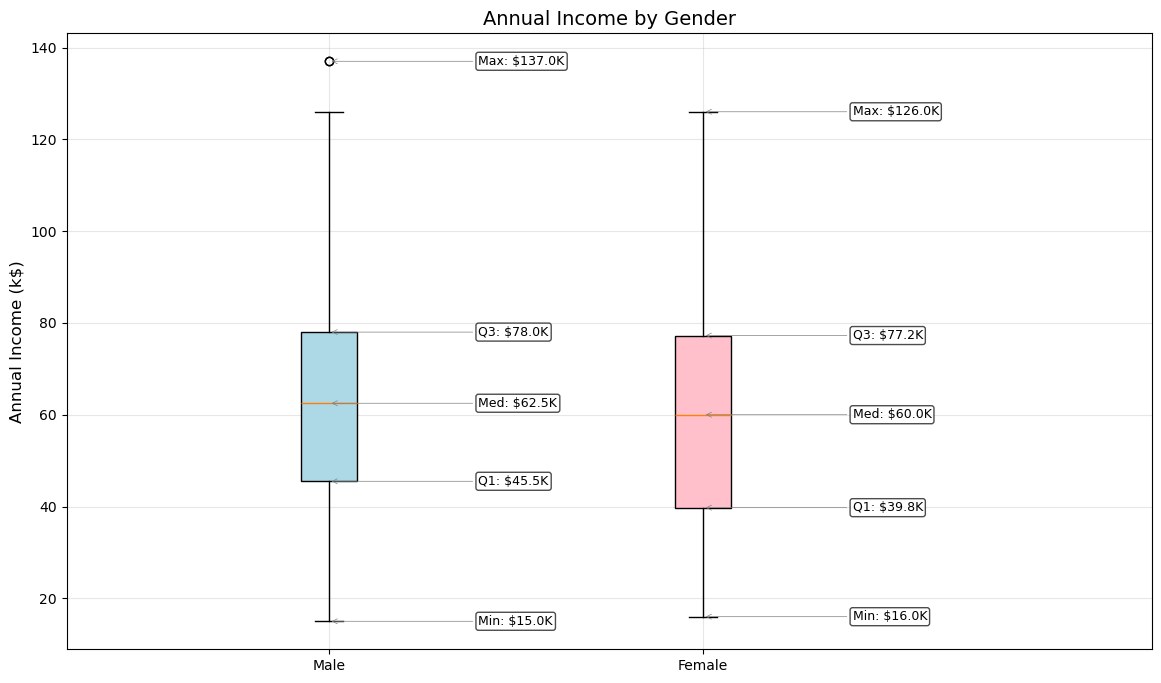

In [87]:
plt.figure(figsize = (14, 8))

male_income = df[df['Genre'] == 'Male']['Annual Income (k$)']
female_income = df[df['Genre'] == 'Female']['Annual Income (k$)']

box_plot = plt.boxplot([male_income, female_income], tick_labels = ['Male', 'Female'], patch_artist = True)

colors = ['lightblue', 'pink']

for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

genders = ['Male', 'Female']
data_groups = [male_income, female_income]

for i, (gender, data) in enumerate(zip(genders, data_groups), 1):
    stats = data.describe()
    
    annotations = [
        (f'Min: ${stats["min"]:.1f}K', stats['min']),
        (f'Q1: ${stats["25%"]:.1f}K', stats['25%']),
        (f'Med: ${stats["50%"]:.1f}K', stats['50%']),
        (f'Q3: ${stats["75%"]:.1f}K', stats['75%']),
        (f'Max: ${stats["max"]:.1f}K', stats['max']),
    ]

    
    for j, (label, value) in enumerate(annotations):
        plt.annotate(label, xy = (i, value), xytext = (i + 0.4, value), fontsize = 9, verticalalignment = 'center', arrowprops = dict(arrowstyle = '->', color = 'gray', lw = 0.5), bbox = dict(boxstyle = "round, pad = 0.2", facecolor = "white", alpha = 0.7))
    
plt.title('Annual Income by Gender', fontsize = 14)
plt.ylabel('Annual Income (k$)', fontsize = 12)
plt.xlim(0.3, 3.2)
plt.grid(True, alpha = 0.3)
plt.show()